In [1]:
import MetaTrader5 as mt5
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
pd.options.display.float_format = '{:.4f}'.format
plt.style.use('seaborn')

from datetime import datetime

mt5.initialize()

C:\Users\Guido\AppData\Local\Temp\ipykernel_3052\1844221169.py:7: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


True

In [21]:
if not mt5.initialize():
    print("initialize() failed, error code =",mt5.last_error())
    quit()
 
# get all symbols
symbols=mt5.symbols_get()
print('Symbols: ', len(symbols))

Symbols:  837


In [27]:
# get symbols whose names do not contain USD, EUR, JPY and GBP
group_symbols=mt5.symbols_get(group="*,!*EURGBP*,!*EURUSD*,!*GBPUSD*")
print('Symbols:', len(group_symbols))
for s in group_symbols:
    print(s.name)

Symbols: 834
AAL
ACHC
ADBE
ADI
ADP
ADSK
AKAM
ALGN
ALNY
AMAT
AMD
AMED
AMGN
AMKR
AMZN
ANSS
APA
APLS
ARCC
ARWR
AVGO
AXON
AZPN
AZTA
BIIB
BKNG
BL
BLDR
BMRN
BPMC
BRKR
CACC
CAR
CASY
CDNS
CDW
CG
CGNX
CHDN
CHRW
CHTR
CHX
CINF
CMCSA
CME
COLM
COST
CPRT
CROX
CRWD
CSGP
CSX
CTAS
CTSH
DBX
DDOG
DLTR
DNLI
DOCU
DOX
DXCM
EA
EBAY
EEFT
ENPH
ENTG
ETSY
EWBC
EXEL
A
AA
AAP
ABBV
ABT
ACM
ACN
ADM
AEP
AES
AFG
AFL
AGCO
AIG
AIZ
AJG
AL
ALB
ALK
ALL
ALLY
AME
AMG
AMP
AMT
AN
ANET
AON
AOS
APD
APH
ARES
ARMK
ARW
ASH
AVTR
AVY
AWI
AWK
AXTA
AYI
AZO
BAC
BAH
BALL
BAX
BBY
BC
BDX
BEN
BERY
BFAM
BILL
BIO
BJ
BK
BKR
BLD
BLK
BMY
BR
BRKb
BRO
BSX
BURL
BWA
BX
BYD
C
CABO
CACI
CAG
CAH
CARR
CB
CBRE
CC
CCI
CCK
CCL
CE
CF
CFG
CFR
CHD
CHE
CHGG
CHWY
CI
CIEN
CL
CLF
CLX
CMA
CMG
CMI
CMS
CNC
CNP
COF
COHR
COO
COP
COR
COTY
CPAY
CRL
CRM
CSL
CTLT
CTVA
CVNA
CVS
D
DAL
DAR
DAY
DD
DE
DECK
DELL
DFS
DG
DGX
DHI
DHR
DKS
DLB
DOV
DPZ
DRI
DT
DTE
DUK
DVA
DVN
DXC
ECL
EFX
EHC
EIX
EL
ELAN
ELV
EME
EMN
EMR
ENOV
EOG
EPAM
EQH
EQT
ES
ESI
ESNT
ESTC
ETN
ETR
EVR
EVRG
EW
EXC
EXP

In [22]:
count = 0
for s in symbols:
    count+=1
    print("{}. {}".format(count,s.name))
    if count==1000: break
print()

1. EURGBP
2. EURUSD
3. GBPUSD
4. AAL
5. ACHC
6. ADBE
7. ADI
8. ADP
9. ADSK
10. AKAM
11. ALGN
12. ALNY
13. AMAT
14. AMD
15. AMED
16. AMGN
17. AMKR
18. AMZN
19. ANSS
20. APA
21. APLS
22. ARCC
23. ARWR
24. AVGO
25. AXON
26. AZPN
27. AZTA
28. BIIB
29. BKNG
30. BL
31. BLDR
32. BMRN
33. BPMC
34. BRKR
35. CACC
36. CAR
37. CASY
38. CDNS
39. CDW
40. CG
41. CGNX
42. CHDN
43. CHRW
44. CHTR
45. CHX
46. CINF
47. CMCSA
48. CME
49. COLM
50. COST
51. CPRT
52. CROX
53. CRWD
54. CSGP
55. CSX
56. CTAS
57. CTSH
58. DBX
59. DDOG
60. DLTR
61. DNLI
62. DOCU
63. DOX
64. DXCM
65. EA
66. EBAY
67. EEFT
68. ENPH
69. ENTG
70. ETSY
71. EWBC
72. EXEL
73. A
74. AA
75. AAP
76. ABBV
77. ABT
78. ACM
79. ACN
80. ADM
81. AEP
82. AES
83. AFG
84. AFL
85. AGCO
86. AIG
87. AIZ
88. AJG
89. AL
90. ALB
91. ALK
92. ALL
93. ALLY
94. AME
95. AMG
96. AMP
97. AMT
98. AN
99. ANET
100. AON
101. AOS
102. APD
103. APH
104. ARES
105. ARMK
106. ARW
107. ASH
108. AVTR
109. AVY
110. AWI
111. AWK
112. AXTA
113. AYI
114. AZO
115. BAC
116. BAH


In [30]:
import MetaTrader5 as mt5
import numpy as np
import pandas as pd
from scipy.stats import kendalltau
from datetime import datetime, timedelta

# Connect to MetaTrader 5
if not mt5.initialize():
    print("initialize() failed")
    mt5.shutdown()

# Retrieve symbols
group_symbols = mt5.symbols_get(group="*,!*EURGBP*,!*EURUSD*,!*GBPUSD*")

# Extract symbol names
symbol_names = [symbol.name for symbol in group_symbols]

In [31]:
%%time

# Function to retrieve historical data
def get_historical_data(symbols, lookback_days, timeframe):
    end_time = datetime.now()
    start_time = end_time - timedelta(days=lookback_days)
    
    data = {}
    for symbol in symbols:
        rates = mt5.copy_rates_range(symbol, timeframe, start_time, end_time)
        if rates is not None and len(rates) > 0:
            data[symbol] = pd.DataFrame(rates)[['time', 'close']].set_index('time')
    
    return data

# Retrieve historical data for the group of symbols
lookback_days = 250
historical_data = get_historical_data(symbol_names, lookback_days, mt5.TIMEFRAME_D1)

# Check if historical data is retrieved correctly
for symbol, data in historical_data.items():
    print(f"Symbol: {symbol}, Data points: {len(data)}")
    
# Calculate log returns
def calculate_log_returns(historical_data):
    log_returns = {}
    for symbol, data in historical_data.items():
        data['log_return'] = np.log(data['close'] / data['close'].shift(1))
        log_returns[symbol] = data['log_return'].dropna()
    
    return log_returns

log_returns = calculate_log_returns(historical_data)

# Debugging: print log returns data
#print("Log returns calculated for symbols.")
#for symbol, returns in log_returns.items():
 #   print(f"Symbol: {symbol}, Log returns: {returns.head()}")

# Select top 10 pairs with highest Kendall tau
def select_top_10_pairs(log_returns, symbols):
    tau_list = []
    
    for i in range(len(symbols)):
        for j in range(i + 1, len(symbols)):
            symbol1 = symbols[i]
            symbol2 = symbols[j]
            
            if symbol1 in log_returns and symbol2 in log_returns:
                x = log_returns[symbol1]
                y = log_returns[symbol2]
                
                # Align data by index (time)
                common_index = x.index.intersection(y.index)
                x = x.loc[common_index]
                y = y.loc[common_index]
                
                # Calculate Kendall tau correlation
                tau, _ = kendalltau(x, y)
                tau_list.append((tau, symbol1, symbol2))
    
    # Sort the list by tau in descending order and select top 10 pairs
    tau_list.sort(reverse=True, key=lambda x: x[0])
    selected_pairs = []
    used_symbols = set()
    
    for tau, symbol1, symbol2 in tau_list:
        if symbol1 not in used_symbols and symbol2 not in used_symbols:
            selected_pairs.append((symbol1, symbol2))
            used_symbols.add(symbol1)
            used_symbols.add(symbol2)
        if len(selected_pairs) >= 10:
            break
    
    return selected_pairs

# Select the top 10 pairs
top_10_pairs = select_top_10_pairs(log_returns, symbol_names)
print(f"Top 10 Pairs: {top_10_pairs}")


Symbol: AAL, Data points: 173
Symbol: ACHC, Data points: 173
Symbol: ADBE, Data points: 173
Symbol: ADI, Data points: 173
Symbol: ADP, Data points: 173
Symbol: ADSK, Data points: 173
Symbol: AKAM, Data points: 173
Symbol: ALGN, Data points: 173
Symbol: ALNY, Data points: 173
Symbol: AMAT, Data points: 173
Symbol: AMD, Data points: 173
Symbol: AMED, Data points: 173
Symbol: AMGN, Data points: 173
Symbol: AMKR, Data points: 173
Symbol: AMZN, Data points: 173
Symbol: ANSS, Data points: 173
Symbol: APA, Data points: 173
Symbol: APLS, Data points: 173
Symbol: ARCC, Data points: 173
Symbol: ARWR, Data points: 173
Symbol: AVGO, Data points: 173
Symbol: AXON, Data points: 173
Symbol: AZPN, Data points: 173
Symbol: AZTA, Data points: 173
Symbol: BIIB, Data points: 173
Symbol: BKNG, Data points: 173
Symbol: BL, Data points: 173
Symbol: BLDR, Data points: 173
Symbol: BMRN, Data points: 173
Symbol: BPMC, Data points: 173
Symbol: BRKR, Data points: 173
Symbol: CACC, Data points: 173
Symbol: CAR, Da

Top 10 Pairs: [('IJH', 'MDY'), ('IVW', 'SPYG'), ('ITOT', 'SCHB'), ('IVE', 'SPYV'), ('ESGU', 'IWB'), ('SPDW', 'VEA'), ('GOOG', 'GOOGL'), ('IWF', 'SCHG'), ('IYR', 'VNQ'), ('FTEC', 'VGT')]
CPU times: total: 2min 16s
Wall time: 2min 30s


In [32]:
%%time
top_10_pairs

[('IJH', 'MDY'),
 ('IVW', 'SPYG'),
 ('ITOT', 'SCHB'),
 ('IVE', 'SPYV'),
 ('ESGU', 'IWB'),
 ('SPDW', 'VEA'),
 ('GOOG', 'GOOGL'),
 ('IWF', 'SCHG'),
 ('IYR', 'VNQ'),
 ('FTEC', 'VGT')]

In [27]:
%%time
# Flatten the list of pairs to get unique symbols
symbols = list(set([symbol for pair in top_10_pairs for symbol in pair]))

# Function to retrieve historical data
def get_historical_data(symbols, lookback_days):
    end_time = datetime.now()
    start_time = end_time - timedelta(days=lookback_days)
    
    data = {}
    for symbol in symbols:
        rates = mt5.copy_rates_range(symbol, mt5.TIMEFRAME_H1, start_time, end_time)
        if rates is not None and len(rates) > 0:
            df = pd.DataFrame(rates)
            df['time'] = pd.to_datetime(df['time'], unit='s')
            df.set_index('time', inplace=True)
            data[symbol] = df[['close']]
    
    return data

# Retrieve historical data for the group of symbols
lookback_days = 500
historical_data = get_historical_data(symbols, lookback_days)

# Ensure historical data is retrieved correctly
for symbol, data in historical_data.items():
    print(f"Symbol: {symbol}, Data points: {len(data)}")

# Calculate and visualize the spreads for each pair
def plot_spreads(pairs, historical_data):
    plt.figure(figsize=(15, 10))
    for i, (symbol1, symbol2) in enumerate(pairs):
        if symbol1 in historical_data and symbol2 in historical_data:
            data1 = historical_data[symbol1]['close']
            data2 = historical_data[symbol2]['close']
            
            # Align data by index (time)
            common_index = data1.index.intersection(data2.index)
            data1 = data1.loc[common_index]
            data2 = data2.loc[common_index]
            
            # Calculate spread
            spread = data1 - data2
            
            # Plot the spread
            plt.subplot(5, 2, i + 1)
            plt.plot(spread, label=f'{symbol1} - {symbol2}')
            plt.title(f'Spread: {symbol1} - {symbol2}')
            plt.xlabel('Time')
            plt.ylabel('Spread')
            plt.legend()
    
    plt.tight_layout()
    plt.show()

# Plot the spreads for the top 10 pairs
plot_spreads(top_10_pairs, historical_data)


<Figure size 1500x1000 with 0 Axes>

CPU times: total: 0 ns
Wall time: 3 ms


In [26]:
historical_data

{'FTEC':               close
 time               
 2023-09-12 127.4500
 2023-09-13 127.6800
 2023-09-14 128.5500
 2023-09-15 126.1700
 2023-09-18 126.5100
 ...             ...
 2024-05-13 154.0900
 2024-05-14 155.6500
 2024-05-15 159.3300
 2024-05-16 158.8700
 2024-05-17 157.9700
 
 [173 rows x 1 columns],
 'GOOG':               close
 time               
 2023-09-12 136.0200
 2023-09-13 137.5800
 2023-09-14 139.0300
 2023-09-15 138.4300
 2023-09-18 138.9000
 ...             ...
 2024-05-13 170.6100
 2024-05-14 171.9400
 2024-05-15 173.9000
 2024-05-16 175.3900
 2024-05-17 177.1800
 
 [173 rows x 1 columns],
 'IVW':              close
 time              
 2023-09-12 71.1500
 2023-09-13 71.3500
 2023-09-14 71.8600
 2023-09-15 70.9300
 2023-09-18 71.0200
 ...            ...
 2024-05-13 84.7100
 2024-05-14 85.3400
 2024-05-15 86.6800
 2024-05-16 86.3600
 2024-05-17 86.2200
 
 [173 rows x 1 columns],
 'IJH':              close
 time              
 2023-09-12 51.5500
 2023-09-13 51.2600
 20

In [23]:
import MetaTrader5 as mt5
import numpy as np
import pandas as pd
from datetime import datetime, timedelta, time
import pytz
import matplotlib.pyplot as plt

# Connect to MetaTrader 5
if not mt5.initialize():
    print("initialize() failed")
    mt5.shutdown()

# List of selected pairs
top_10_pairs = [('IJH', 'MDY'), ('IVW', 'SPYG'), ('ITOT', 'SCHB'), ('IVE', 'SPYV'),
                ('ESGU', 'IWB'), ('SPDW', 'VEA'), ('GOOG', 'GOOGL'), ('IWF', 'SCHG'),
                ('IYR', 'VNQ'), ('FTEC', 'VGT')]

# Flatten the list of pairs to get unique symbols
symbols = list(set([symbol for pair in top_10_pairs for symbol in pair]))

# Function to retrieve historical data
def get_historical_data(symbols, lookback_days):
    end_time = datetime.now()
    start_time = end_time - timedelta(days=lookback_days)
    
    data = {}
    for symbol in symbols:
        rates = mt5.copy_rates_range(symbol, mt5.TIMEFRAME_D1, start_time, end_time)
        if rates is not None and len(rates) > 0:
            df = pd.DataFrame(rates)
            df['time'] = pd.to_datetime(df['time'], unit='s')
            df.set_index('time', inplace=True)
            data[symbol] = df[['close']]
    
    return data

# Retrieve historical data for the group of symbols
lookback_days = 250
historical_data = get_historical_data(symbols, lookback_days)

# Function to calculate spreads
def calculate_spreads(pairs, historical_data):
    spreads = {}
    for symbol1, symbol2 in pairs:
        if symbol1 in historical_data and symbol2 in historical_data:
            data1 = historical_data[symbol1]['close']
            data2 = historical_data[symbol2]['close']
            
            # Align data by index (time)
            common_index = data1.index.intersection(data2.index)
            data1 = data1.loc[common_index]
            data2 = data2.loc[common_index]
            
            # Calculate spread
            spread = data1 - data2
            spreads[(symbol1, symbol2)] = spread
    return spreads

# Calculate spreads for the pairs
spreads = calculate_spreads(top_10_pairs, historical_data)

# Function to filter trading hours (16:30 to 23:00 UTC)
def filter_trading_hours(spread, start_time, end_time):
    spread_filtered = spread.between_time(start_time, end_time)
    return spread_filtered

# Function to segment data by time zone and calculate mean reversion metrics
def analyze_mean_reversion_by_timezone(spreads, mean_reversion_threshold=2):
    results = []
    
    for pair, spread in spreads.items():
        spread_utc = spread.copy()
        spread_filtered = filter_trading_hours(spread_utc, time(16, 30), time(23, 0))
        
        mean = spread_filtered.mean()
        std_dev = spread_filtered.std()
        upper_band = mean + mean_reversion_threshold * std_dev
        lower_band = mean - mean_reversion_threshold * std_dev
        
        buy_signals = spread_filtered[spread_filtered < lower_band]
        sell_signals = spread_filtered[spread_filtered > upper_band]
        
        num_signals = len(buy_signals) + len(sell_signals)
        avg_reversion_time = calculate_average_reversion_time(spread_filtered, lower_band, upper_band)
        
        results.append({
            'pair': pair,
            'num_signals': num_signals,
            'avg_reversion_time': avg_reversion_time
        })
    
    return pd.DataFrame(results)

# Function to calculate average reversion time
def calculate_average_reversion_time(spread, lower_band, upper_band):
    reversion_times = []
    in_position = False
    entry_time = None
    
    for time, value in spread.items():
        if not in_position:
            if value < lower_band or value > upper_band:
                in_position = True
                entry_time = time
        else:
            if lower_band <= value <= upper_band:
                in_position = False
                reversion_times.append((time - entry_time).total_seconds())
    
    if reversion_times:
        return np.mean(reversion_times)
    else:
        return np.nan

# Analyze mean reversion
results = analyze_mean_reversion_by_timezone(spreads)

# Print the results
print("Mean Reversion Analysis Results")
print(results)

# Shutdown MetaTrader 5
mt5.shutdown()


Mean Reversion Analysis Results
            pair  num_signals  avg_reversion_time
0     (IJH, MDY)            0                 NaN
1    (IVW, SPYG)            0                 NaN
2   (ITOT, SCHB)            0                 NaN
3    (IVE, SPYV)            0                 NaN
4    (ESGU, IWB)            0                 NaN
5    (SPDW, VEA)            0                 NaN
6  (GOOG, GOOGL)            0                 NaN
7    (IWF, SCHG)            0                 NaN
8     (IYR, VNQ)            0                 NaN
9    (FTEC, VGT)            0                 NaN


True

In [19]:
print(type(symbols))

<class 'tuple'>


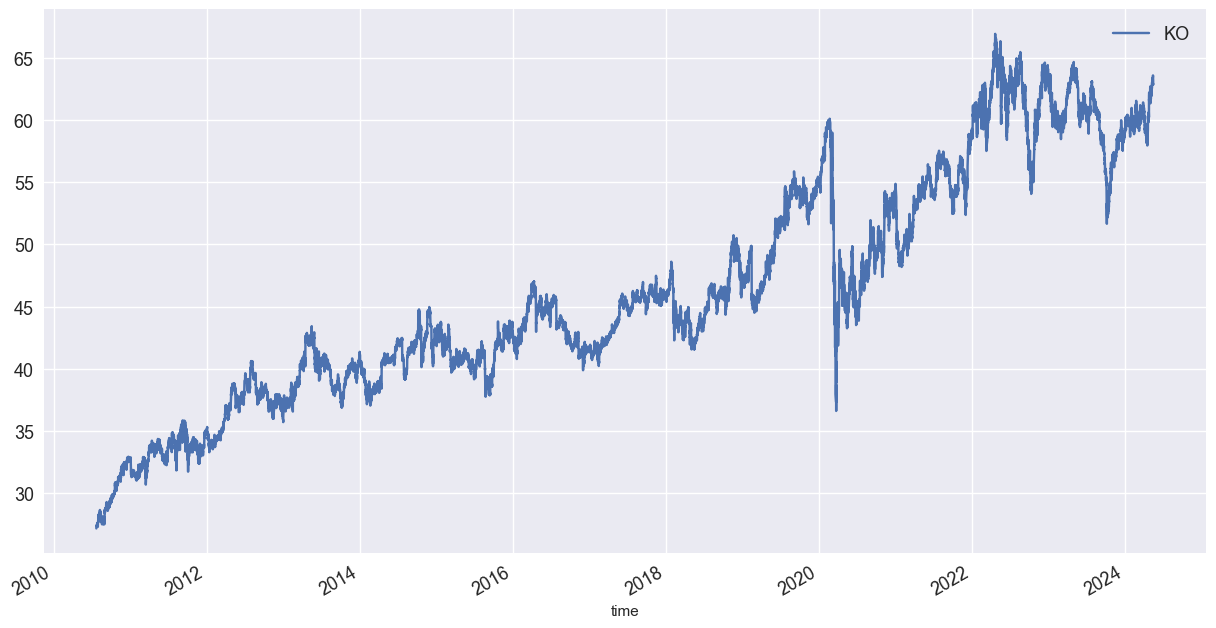

In [56]:
symbols = ['KO']#,'COCACOLA', 'GILT']

# Compute now date
from_date = datetime.now()

# Retrieve OHLC data for each asset and concatenate into a single DataFrame
dfs = []
for symbol in symbols:
    rates = mt5.copy_rates_from(symbol, mt5.TIMEFRAME_M15, from_date, 90000)
    df = pd.DataFrame(rates)
    df['time'] = pd.to_datetime(df['time'], unit='s')
    df.set_index('time', inplace=True)
    df.drop(columns=['spread', 'real_volume','open','tick_volume','high','low'], inplace=True)
    df.rename(columns={'close': f'{symbol}'}, inplace=True)
    dfs.append(df)

df = pd.concat(dfs, axis=1)

# Plot the closing prices for each asset
df.dropna().filter(like=f'{symbol}').plot(figsize=(15, 8), fontsize=13)
plt.legend(fontsize=13)
plt.show()

In [57]:
class ConBacktester():
    def __init__(self, filepath, symbol, start, end, tc):
        
        self.filepath = filepath
        self.symbol = symbol
        self.start = start
        self.end = end
        self.tc = tc
        self.results = None
        self.get_data()
        
    def __repr__(self):
        return 'ConBacktester(symbol = {}, start = {}, end = {})'.format(self.symbol, self.start, self.end)
    
    def get_data(self):
    
        raw = df
        raw = raw[self.symbol].to_frame().fillna(method = 'ffill')
        raw = raw.loc[self.start:self.end].copy()
        raw.rename(columns={self.symbol: 'price'}, inplace=True)
        raw['returns'] = np.log(raw.price / raw.price.shift(1))
        self.data = raw
        
    def test_strategy(self, window = 1):
    
        self.window = window
        
        self.prepare_data(window)
        self.run_backtest()
        
        data = self.results.copy()
        data['creturns'] = data['returns'].cumsum().apply(np.exp)
        data['cstrategy'] = data['strategy'].cumsum().apply(np.exp)
        self.results = data
        
        multiple = round(self.results.cstrategy[-1], 6)
        print('Strategy-Multiple: {}'.format(multiple))

    def prepare_data(self, window):
        
        data = self.data.copy()
        data["roll_return"] = data["returns"].rolling(window).mean()
        data["position"] = -np.sign(data["roll_return"])
        self.results = data
        
    def run_backtest(self):
        
        ''' Runs the strategy backtest.
        '''
        
        data = self.results.copy()
        data["strategy"] = data["position"].shift(1) * data["returns"]
        data.dropna(inplace=True)
        
        # determine the number of trades in each bar
        data["trades"] = data.position.diff().fillna(0).abs()
        
        # subtract transaction/trading costs from pre-cost return
        data.strategy = data.strategy - data.trades * self.tc
        
        self.results = data
        
    def plot_results(self):
        '''  Plots the cumulative performance of the trading strategy compared to buy-and-hold.
        '''
        if self.results is None:
            print("Run test_strategy() first.")
        else:
            title = "{} | Window = {} | TC = {}".format(self.symbol, self.window, self.tc)
            self.results[["creturns", "cstrategy"]].plot(title=title, figsize=(12, 8))
            
    def optimize_strategy(self, window_range):
        '''
        Backtests strategy for different parameter values incl. Optimization and Reporting (Wrapper).
         
        Parameters
        ============
        window_range: tuple
            tuples of the form (start, end, step size).
        '''
        
        windows = range(*window_range)
        
        performance = []
        for window in windows:
            self.prepare_data(window)
            self.run_backtest()
            performance.append(np.exp(self.results.strategy.sum()))
    
        self.results_overview =  pd.DataFrame(data = np.array(windows), columns = ["Windows"])
        self.results_overview["Performance"] = performance
        self.find_best_strategy()
        
    def find_best_strategy(self):
        ''' Finds the optimal strategy (global maximum) given the window parameter range.
        '''
        best = self.results_overview.nlargest(1, "Performance")
        window = best.Windows.iloc[0]
        perf = best.Performance.iloc[0]
        print("Windows: {} | Multiple: {}".format(window, round(perf, 6)))
        self.test_strategy(window)
        
    def visualize_many(self):
        ''' Plots parameter values vs. Performance.
        '''

        if self.results_overview is None:
            print("Run optimize_strategy() first.")
        else:
            self.results_overview.set_index("Windows", inplace = True)
            self.results_overview.plot(figsize = (12, 8))
            plt.title("Simple Contrarian Strategy | Performance vs Windows", fontsize = 15)
            plt.xlabel("Windows", fontsize = 15)
            plt.ylabel("Multiple", fontsize = 15)
            plt.show()     

In [58]:
start = '2022-12-02'
end = '2024-05-13'
tc = 0.000167
tester = ConBacktester(filepath= 'df', symbol = symbol, start = start, end = end, tc = tc)
tester

C:\Users\Guido\AppData\Local\Temp\ipykernel_14228\1491137597.py:18: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  raw = raw[self.symbol].to_frame().fillna(method = 'ffill')


ConBacktester(symbol = KO, start = 2022-12-02, end = 2024-05-13)

In [59]:
tester.test_strategy(window = 4)

Strategy-Multiple: 0.534696


C:\Users\Guido\AppData\Local\Temp\ipykernel_14228\1491137597.py:36: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  multiple = round(self.results.cstrategy[-1], 6)


In [60]:
tester.optimize_strategy((1, 1001, 1))

Windows: 487 | Multiple: 1.128535
Strategy-Multiple: 1.128535


C:\Users\Guido\AppData\Local\Temp\ipykernel_14228\1491137597.py:36: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  multiple = round(self.results.cstrategy[-1], 6)


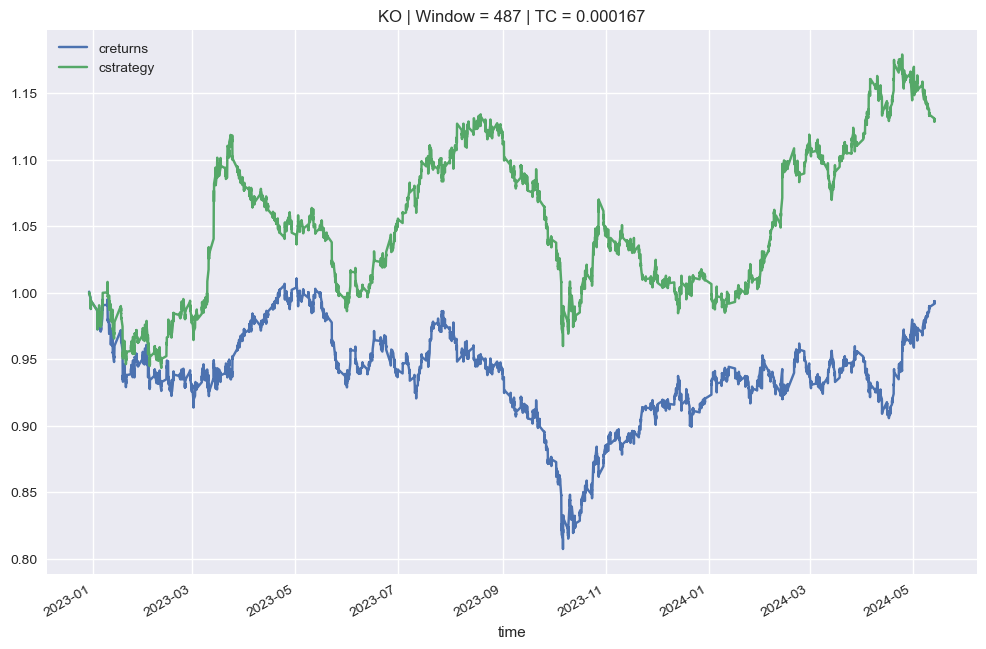

In [61]:
tester.plot_results()